In [1]:
# https://huggingface.co/mistralai/Mixtral-8x7B-Instruct-v0.1

In [3]:

def gcd(u, v):
    if v != 0:
        (u, v) = (v, u % v)
    return abs(u)

gcd(144, 12)

12

In [8]:
# demo NN
import numpy as np

x0 = np.array([[1], [0]])
w0 = np.array([[0, 1]])

y = x0 * w0

y

array([[0, 1],
       [0, 0]])

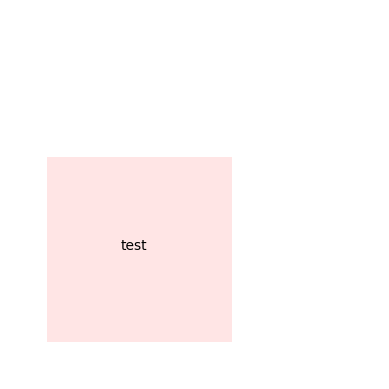

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x=y=0.1
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
patch= ax1.add_patch(patches.Rectangle((x, y), 0.5, 0.5, alpha=0.1,facecolor='red',label='Label'))

centerx = x + 0.5/2 - 0.05
centery = y + 0.5/2

plt.axis('off')
plt.text(centerx, centery,'test')
plt.show()

## Simple NN Demo


In [21]:
# weight --- w1 ---- h1
#        \ /-----w2-/  \ w5 - output:
#        / \-----w3-\  / w6 - gender
# height --- w4 ---- h2

In [138]:
# https://victorzhou.com/blog/intro-to-neural-networks/
import numpy as np
import time

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.15
    epochs = 200 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 20 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# training dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

start = time.time()
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)
end = time.time()
print(f"execution time: {(end-start) * 10**3} ms")

Epoch 0 loss: 0.147
Epoch 20 loss: 0.047
Epoch 40 loss: 0.028
Epoch 60 loss: 0.020
Epoch 80 loss: 0.015
Epoch 100 loss: 0.012
Epoch 120 loss: 0.010
Epoch 140 loss: 0.008
Epoch 160 loss: 0.007
Epoch 180 loss: 0.006
execution time: 13.095617294311523 ms


In [139]:
# validation
# test data
testdata = np.array([
  [-3, -1],  # Rachel
  [21, 5],   # John
])

test_truth = np.array([
  1, # Rachel
  0, # John
])

test_preds = np.apply_along_axis(network.feedforward, 1, testdata)
loss = mse_loss(test_truth, test_preds)
print(f"validation loss: {loss}")

validation loss: 0.0056283013651685886


In [140]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.936
Frank: 0.075


In [28]:
# how to prevent overfitting: https://programming-review.com/machine-learning/overfitting

In [144]:
import numpy as np
import time

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred[:,0,0]) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Weights
    self.w0 = np.random.randn(2, 2)
    self.w1 = np.random.randn(2, 1)

    # Biases
    self.b0 = np.random.randn(1, 2)
    self.b1 = np.random.randn(1, 1)

  def feedforward(self, x):
      # x is a numpy array with 2 elements#
      h0 = sigmoid(np.dot(x, self.w0) + self.b0)
      o0 = sigmoid(np.dot(h0, self.w1) + self.b1)
      return o0

  def train(self, data, all_y_trues):
      '''
      - data is a (n x 2) numpy array, n = # of samples in the dataset.
      - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
      '''
      learn_rate = 0.15
      epochs = 200 # number of times to loop through the entire dataset
      
      for epoch in range(epochs):
          for x, y_true in zip(data, all_y_trues):
              # --- Do a feedforward (we'll need these values later)
              y_pred = self.feedforward(x)

              # backpropagation
              d_L_d_ypred = -2 * (y_true - y_pred)  # (1,2)
              h0pre = np.dot(x, self.w0) + self.b0
              h0 = sigmoid(h0pre)
              dL_b1 = d_L_d_ypred * deriv_sigmoid(np.dot(h0, self.w1) + self.b1)
              dL_w1 = dL_b1 * h0.T
              dL_b0 = dL_b1 * np.dot(deriv_sigmoid(h0pre), self.w1)  # (1,2)
              dL_w0 = dL_b0 * x
              
              # --- Update weights and biases
              self.w1 -= learn_rate * dL_w1
              self.b1 -= learn_rate * dL_b1
              self.w0 -= learn_rate * dL_w0
              self.b0 -= learn_rate * dL_b0
          # --- Calculate total loss at the end of each epoch
          if epoch % 20 == 0:
              y_preds = np.apply_along_axis(self.feedforward, 1, data)
              loss = mse_loss(all_y_trues, y_preds)
              print("Epoch %d loss: %.3f" % (epoch, loss))

# training dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

start = time.time()
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)
end = time.time()
print(f"execution time: {(end-start) * 10**3} ms")

Epoch 0 loss: 0.213
Epoch 20 loss: 0.045
Epoch 40 loss: 0.032
Epoch 60 loss: 0.024
Epoch 80 loss: 0.019
Epoch 100 loss: 0.016
Epoch 120 loss: 0.014
Epoch 140 loss: 0.012
Epoch 160 loss: 0.010
Epoch 180 loss: 0.009
execution time: 36.1020565032959 ms


In [145]:
# Make some predictions
emily = np.array([-7, -3])
frank = np.array([20, 2]) 
print(f"Emily: {network.feedforward(emily)}")
print(f"Frank: {network.feedforward(frank)}")

Emily: [[0.94764341]]
Frank: [[0.08808194]]


In [147]:
# https://www.pragnakalp.com/generate-music-using-metas-musicgen-on-colab/
# https://til.simonwillison.net/machinelearning/musicgen
# https://huggingface.co/spaces/facebook/MusicGen

from transformers import pipeline
import scipy

synthesiser = pipeline("text-to-audio", "facebook/musicgen-small")

music = synthesiser("dark lo-fi music with an increasing drumbeat", forward_params={"do_sample": True})

scipy.io.wavfile.write("musicgen_out.wav", rate=music["sampling_rate"], data=music["audio"])


Using the model-agnostic default `max_length` (=1500) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.


In [2]:
from transformers import AutoProcessor, MusicgenForConditionalGeneration
import scipy

processor = AutoProcessor.from_pretrained("facebook/musicgen-small")
model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-small")

def save(prompt, filename, num_tokens=1503):
    inputs = processor(
        text=[prompt],
        padding=True,
        return_tensors="pt",
    )
    audio_values = model.generate(**inputs, max_new_tokens=num_tokens)
    sampling_rate = model.config.audio_encoder.sampling_rate
    scipy.io.wavfile.write(filename, rate=sampling_rate, data=audio_values[0, 0].numpy())

save("classical fantasy with strings and guitars, like birds in the woods", "lotro0.wav")

D:\Anaconda\envs\tf-gpu\lib\site-packages\torch\nn\utils\weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [163]:
#(5724.69*4 + 26880 - 9300)/74297.99
#74297.99*0.5/14
#37000/0.4
39*40/40*25

975.0

In [6]:
# https://huggingface.co/BAAI/bge-m3
# test sentence similarity
lst = [0, 1, 2, 3]

print(lst[1:], lst[:1])

[1, 2, 3] [0]


In [17]:


def euclidrhythm(elementsleft, elementsright, lsep=0):
    lr = len(elementsright)
    ll = len(elementsleft)
    if lr < 2 and elementsleft[0] == elementsleft[-1]:
        return elementsleft, elementsright
    if lr > 1:
        elementsleft = [el + elementsright.pop() if idx < lr else el for idx, el in enumerate(elementsleft)]
        return euclidrhythm(elementsleft, elementsright, ll-lr+1)
    elementsright = [el for el in elementsleft[lsep:]]
    elementsleft = [el for el in elementsleft[:lsep]]
    return euclidrhythm(elementsleft, elementsright, lr)

def E(k, n):
    s = [[1] if i < k else [0] for i in range(n)]
    d = n - k
    n = max(k, d)
    k = min(k, d)
    z = d
    while z > 0 or k > 1:
        for i in range(k):
            s[i].extend(s[len(s) - 1 - i])
        s = s[:-k]
        z = z - k
        d = n - k
        n = max(k, d)
        k = min(k, d)
    return [item for sublist in s for item in sublist]

el = ['1'] * 5
er = ['0'] * 13
print(euclidrhythm(el, er))
print(''.join(map(str, E(5, 18))))

(['1000100', '1000100'], ['1000'])
100010010001001000


In [22]:
# https://huggingface.co/facebook/bart-large-cnn?text=Baseline+disease+severity+of+patients+with+Ulcerative+Colitis+influences+rapid+symptom+relief+under%0D%0Afilgotinib+treatment%3A+post+hoc+analysis+of+the+phase+2b%2F3+SELECTION+study%0D%0A%0D%0APlease+enter+text+to+be+summarized%3A+Background%3A+Filgotinib+%28FIL%29+is+an+oral%2C+once-daily%2C+Janus+kinase+1+preferential+inhibitor+approved+in+Europe+and+Japan+for+the+treatment+of+ulcerative+colitis+%28UC%29.+A+recent+analysis+of+SELECTION+trial+data+%28NCT02914522%29+showed+rapid+and+sustained+improvements+in+UC+symptoms+with+FIL+200+mg+%28FIL200%29+treatment+in+patients+with+moderate-to-severe+UC.1+Here+we+assess+symptomatic+remission+rates+over+time+with+FIL200+induction+treatment+according+to+baseline+UC+disease+severity+%28partial+Mayo+Clinic+Score+%5BpMCS%5D%29.+Methods%3A+SELECTION+was+a+phase+2b%2F3+randomized%2C+double-blind%2C+placebo-controlled+study.+Patients+aged+18%E2%80%9375+years+were+randomized+%282%3A2%3A1%29+to+receive+FIL200%2C+FIL+100+mg+or+placebo+once+daily+for+11+weeks+in+induction+study+A+%28biologic-naive+patients%29+or+induction+study+B+%28biologicexperienced+patients%29.+In+this+post+hoc+analysis%2C+proportions+of+patients+with+symptomatic+remission+%28Mayo+rectal+bleeding+sub-score+of+0+and+Mayo+stool+frequency+sub-score+of+%E2%89%A4+1%29%2C+from+days+2+to+15+and+weeks+2+to+10+of+the+induction+study%2C+were+analysed+at+each+timepoint+by+baseline+pMCS+%28pMCS+%E2%89%A57+and+pMCS+%3C7+%5Bcut-off+previously+used+for+severe+and+moderate+disease%2C+respectively%5D2%29.+Symptomatic+remission+rates+were+compared+between+the+pMCS+%E2%89%A57+and+pMCS+%3C7+groups+within+the+FIL200+and+placebo+arms+using+a+Cochran%E2%80%93Mantel%E2%80%93Haenszel+test+adjusted+by+study+randomization+stratification+factors.+Nominal+p+values+%3C0.05+were+considered+statistically+significant.+Results%3A+At+day+2%2C+symptomatic+remission+rates+with+FIL200+treatment+were+significantly+higher+in+patients+with+baseline+pMCS+%3C7+than+in+those+with+baseline+pMCS+%E2%89%A57+%288.4%25+vs+1.1%25%2C+p%3D0.009+%5Binduction+study+A%5D%3B+8.8%25+vs+0.7%25%2C+p%3D0.004+%5Binduction+study+B%5D%29+%28Figure+A+and+B%29.+From+days+2+to+15%2C+symptomatic+remission+rates+increased+in+both+groups+and%2C+except+for+day+7+for+induction+study+A+and+day+9+for+induction+study+B%2C+continued+to+be+significantly+higher+in+those+with+baseline+pMCS+%3C7.+From+week+2%2C+symptomatic+remission+rates+with+FIL200+treatment+generally+continued+to+increase+in+both+pMCS+%E2%89%A57+and+pMCS+%3C7+groups+%28Figure+C+and+D%29.+By+week+10%2C+symptomatic+remission+rates+with+FIL200+treatment+were+no+longer+significantly+different+between+those+with+baseline+pMCS+%3C7+and+those+with+baseline+pMCS+%E2%89%A57+%2854.8%25+vs+43.3%25%2C+p%3D0.124+%5Binduction+study+A%5D%3B+39.5%25+vs+26.4%25%2C+p%3D0.099+%5Binduction+study+B%5D%29.+Conclusion%3A+Symptomatic+response+to+FIL200+occurs+more+rapidly+in+patients+with+lower+UC+disease+severity+than+in+those+with+higher+UC+disease+severity.+However%2C+converging+response+rates+over+10+weeks+of+treatment+leads+to+symptomatic+remission+regardless+of+baseline+UC+disease+severity

from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

#ARTICLE = """ xxxx
#"""
ARTICLE = input("Please enter text to be summarized:")
print(summarizer(ARTICLE, max_length=80, min_length=60, do_sample=False))

Please enter text to be summarized: Lowering low-density lipoprotein cholesterol (LDL-C) levels decreases major cardiovascular events and is recommended for patients at elevated cardiovascular risk. However, appropriate doses of statin therapy are often insufficient to reduce LDL-C in accordance with current guidelines. In such cases, treatment could be supplemented with nonstatin lipid-lowering therapy. Methods and Results A systematic literature review and network meta-analysis were conducted on randomized controlled trials of nonstatin lipid-lowering therapy added to maximally tolerated statins, including statin-intolerant patients. The primary objective was to assess relative efficacy of nonstatin lipid-lowering therapy in reducing LDL-C levels at week 12. Secondary objectives included the following: LDL-C level reduction at week 24 and change in non-high-density lipoprotein cholesterol and apolipoprotein B at week 12. There were 48 randomized controlled trials included in the prim

[{'summary_text': 'Lowering low-density lipoprotein cholesterol (LDL-C) levels decreases major cardiovascular events. appropriate doses of statin therapy are often insufficient to reduce LDL-C in accordance with current guidelines. Treatment could be supplemented with nonstatin lipid-lowering therapy. Evolocumab, 140 mg every 2 weeks (Q2W)/420 mg once a month,'}]


In [14]:


def fibfun(x, n=20):
    return sum([(x-x*x)**i for i in range(n)])

x = 3
print(fibfun(x), 1 / (1-x-x*x))

-522308348580425 -0.09090909090909091


In [34]:
import pandas as pd
import os


MY_PATH = r'C:\Users\bscho\Desktop'
os.chdir(MY_PATH)

df = pd.read_csv('number-of-wars-project-mars.csv')
pd.set_option("display.precision", 2)

print(df.head())
print(df.columns)

     Entity Code  Year  Number of ongoing wars - Conflict_type: civil war  \
0  Americas  NaN  1800                                                  0   
1  Americas  NaN  1801                                                  0   
2  Americas  NaN  1802                                                  0   
3  Americas  NaN  1803                                                  0   
4  Americas  NaN  1804                                                  0   

   Number of ongoing wars - Conflict_type: others (non-civil)  
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           
Index(['Entity', 'Code', 'Year',
       'Number of ongoing wars - Conflict_type: civil war',
       'Number of ongoing wars - Conflict_type: others (non-

In [42]:
# https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/notebook

In [35]:
df.describe()
# df.describe(include=["object", "bool"])

,Year,Number of ongoing wars - Conflict_type: civil war,Number of ongoing wars - Conflict_type: others (non-civil)
count,1272.00,1272.00,1272.00
mean,1905.50,0.50,0.71
std,61.22,0.94,1.09
min,1800.00,0.00,0.00
25%,1852.75,0.00,0.00
50%,1905.50,0.00,0.00
75%,1958.25,1.00,1.00
max,2011.00,7.00,8.00


In [36]:
df.sort_values(by="Number of ongoing wars - Conflict_type: civil war", ascending=False).head()

,Entity,Code,Year,Number of ongoing wars - Conflict_type: civil war,Number of ongoing wars - Conflict_type: others (non-civil)
1254,World,OWID_WRL,1994,7,1
1252,World,OWID_WRL,1992,6,1
1255,World,OWID_WRL,1995,5,0
542,Europe,NaN,1918,5,2
1178,World,OWID_WRL,1918,5,3


In [37]:
df.sort_values(by=["Year", "Number of ongoing wars - Conflict_type: civil war"], ascending=[True, False]).head()

,Entity,Code,Year,Number of ongoing wars - Conflict_type: civil war,Number of ongoing wars - Conflict_type: others (non-civil)
0,Americas,NaN,1800,0,0
212,Asia and Oceania,NaN,1800,0,0
424,Europe,NaN,1800,0,1
636,North Africa and the Middle East,NaN,1800,0,0
848,Sub-Saharan Africa,NaN,1800,0,0


In [38]:
df["Number of ongoing wars - Conflict_type: civil war"].mean()

0.49842767295597484

In [69]:
df[df["Number of ongoing wars - Conflict_type: civil war"] == 1].head()

,Entity,Code,Year,Number of ongoing wars - Conflict_type: civil war,Number of ongoing wars - Conflict_type: others (non-civil)
24,Americas,NaN,1824,1,0
28,Americas,NaN,1828,1,2
29,Americas,NaN,1829,1,1
30,Americas,NaN,1830,1,0
31,Americas,NaN,1831,1,0


In [40]:
df[df["Entity"].apply(lambda state: state[0] == "W")].head()

,Entity,Code,Year,Number of ongoing wars - Conflict_type: civil war,Number of ongoing wars - Conflict_type: others (non-civil)
1060,World,OWID_WRL,1800,0,1
1061,World,OWID_WRL,1801,0,3
1062,World,OWID_WRL,1802,0,1
1063,World,OWID_WRL,1803,0,2
1064,World,OWID_WRL,1804,1,3


In [41]:
df.pivot_table(
    ["Number of ongoing wars - Conflict_type: civil war", "Number of ongoing wars - Conflict_type: others (non-civil)"],
    ["Entity"],
    aggfunc="mean",
)

,Number of ongoing wars - Conflict_type: civil war,Number of ongoing wars - Conflict_type: others (non-civil)
Entity,,
Americas,0.38,0.26
Asia and Oceania,0.44,0.74
Europe,0.30,0.32
North Africa and the Middle East,0.17,0.54
Sub-Saharan Africa,0.20,0.30
World,1.50,2.08


In [55]:
df.loc[df["Entity"].apply(lambda state: state[0] == "W")][["Year", "Number of ongoing wars - Conflict_type: civil war"]].head()

,Year,Number of ongoing wars - Conflict_type: civil war
1060,1800,0
1061,1801,0
1062,1802,0
1063,1803,0
1064,1804,1


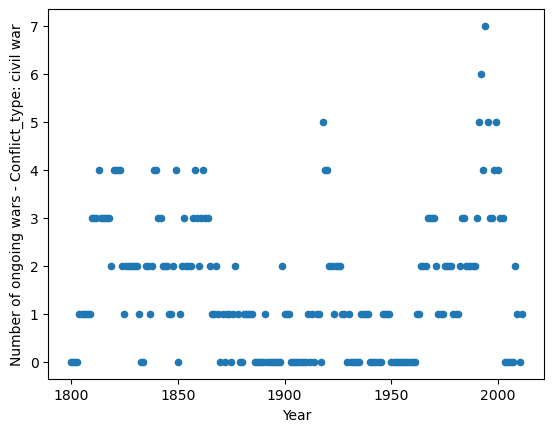

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

dfplot = df.loc[df["Entity"].apply(lambda state: state[0] == "W")][["Year", "Number of ongoing wars - Conflict_type: civil war"]]

dfplot.plot.scatter(x = "Year", y = "Number of ongoing wars - Conflict_type: civil war")

plt.show()


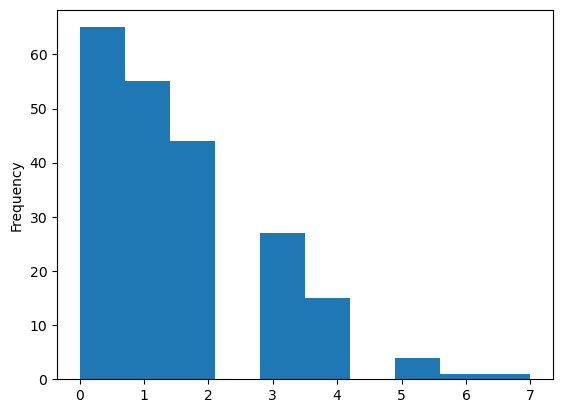

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

dfplot = df.loc[df["Entity"].apply(lambda state: state[0] == "W")][["Year", "Number of ongoing wars - Conflict_type: civil war"]]

dfplot["Number of ongoing wars - Conflict_type: civil war"].plot(kind = 'hist')
#dfplot["Year"].plot(kind = 'hist')

plt.show()


In [76]:
[(2*a-1)/(a-2) for a in range(3,25)]

[5.0,
 3.5,
 3.0,
 2.75,
 2.6,
 2.5,
 2.4285714285714284,
 2.375,
 2.3333333333333335,
 2.3,
 2.272727272727273,
 2.25,
 2.230769230769231,
 2.2142857142857144,
 2.2,
 2.1875,
 2.176470588235294,
 2.1666666666666665,
 2.1578947368421053,
 2.15,
 2.142857142857143,
 2.1363636363636362]

In [78]:
# https://huggingface.co/runwayml/stable-diffusion-v1-5
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  
    
image.save("astronaut_rides_horse.png")

ModuleNotFoundError: No module named 'diffusers'

In [79]:
# https://github.com/huggingface/transformers

In [85]:
# https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    top_k=1
)

print(distilled_student_sentiment_classifier("I love this movie and i would watch it again and again!"))
print(distilled_student_sentiment_classifier("Although no survival advantage was demonstrated, all the trials suffered of a high post-progression treatment cross-over, which predictably undermined the results."))

print(distilled_student_sentiment_classifier("Das ist ein hervorragender Film, wirklich großartig.!"))


[[{'label': 'positive', 'score': 0.9731044769287109}]]
[[{'label': 'negative', 'score': 0.5804390907287598}]]
[[{'label': 'positive', 'score': 0.971721887588501}]]


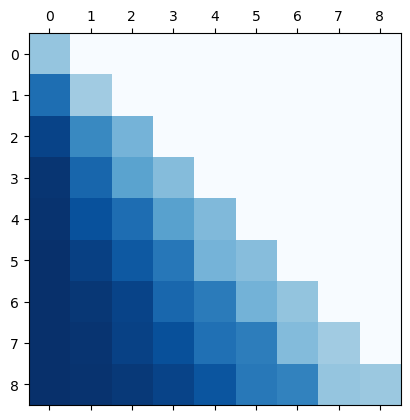

[[0.395 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.761 0.366 0.    0.    0.    0.    0.    0.    0.   ]
 [0.925 0.658 0.475 0.    0.    0.    0.    0.    0.   ]
 [0.978 0.791 0.55  0.437 0.    0.    0.    0.    0.   ]
 [0.988 0.872 0.764 0.558 0.448 0.    0.    0.    0.   ]
 [0.999 0.934 0.841 0.725 0.475 0.431 0.    0.    0.   ]
 [1.    0.97  0.923 0.787 0.708 0.478 0.402 0.    0.   ]
 [1.    0.981 0.93  0.876 0.751 0.701 0.441 0.366 0.   ]
 [0.998 0.987 0.962 0.923 0.858 0.72  0.681 0.397 0.381]]


In [132]:
# risk
import random
import matplotlib.pyplot as plt
import numpy as np

def attackwin(a, d):
    '''attack and defence dice rolls'''
    if d == 0:
        if a > 0:
            return (1, 0)
        return (0, 0)
    d = min(d,a)
    athrows = [random.choice(list(range(1, 7))) for i in range(a)]
    dthrows = [random.choice(list(range(1, 7))) for i in range(d)]
    athrows.sort(reverse=True)
    dthrows.sort(reverse= True)
    return athrows, dthrows

def attacklosses(a, d):
    '''troop losses for attacker and defender'''
    athrows, dthrows = attackwin(a, d)
    losses = [0, 0]
    for idx, dt in enumerate(dthrows):
        if athrows[idx] > dt:
            losses[1] += 1
        else:
            losses[0] += 1
    return losses

def awin(a, d):
    '''attacker wins'''
    while a >= d and d > 0:
        losses = attacklosses(min(a,3), min(d,2))
        a -= losses[0]
        d -= losses[1]
    if d == 0:
        return 1
    return 0

def pawin(a, d, n=1000):
    pawin = 0
    for i in range(n):
        pawin += awin(a, d)
    return pawin/n

a = np.array([[pawin(a,d) for d in range(1,10)] for a in range(1,10)])
plt.matshow(a, cmap=plt.cm.Blues)
plt.show()
print(a)

In [137]:
99*500/13.76

3597.383720930233

In [1]:
# https://pypi.org/project/rank-bm25/

from rank_bm25 import BM25Okapi

corpus = [
    "Hello there good man!",
    "It is quite windy in London",
    "How is the weather today?"
]

tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

query = "windy London"
tokenized_query = query.split(" ")

bm25.get_top_n(tokenized_query, corpus, n=1)

['It is quite windy in London']

In [3]:
from rank_bm25 import BM25Okapi

corpus = [
    "Achieving an LDL-C of 40-50 mg/dl seems to be safe, and importantly might offer CV beneficial effects. Data for attaining levels below 25 mg/dl is limited, however in favor of such reductions.",
    "Despite decades of medical advances, ASCVD remains one of the major causes of morbidity and mortality worldwide. Statin use has multiplied since the validation of LDL hypothesis, however, it is undeniable a more effective and well-tolerated agent is needed in significant number or patients. With the arrival of the era of unprecedented CV protection with PCSK9 inhibition, this exciting new therapy holds a pivotal promise as the future of lipid management. The data available already indicate safety, tolerability and superb efficacy of these agents, which are already changing contemporary cholesterol management. The rapid translation of innovative basic science research into drug development may lead to CV outcomes reduction and confirm that this pathway will become prominently utilized.",
    "Patients achieving an LDL-C level less than 30 mg/dL at 1 month had a similar safety profile (and numerically the lowest rate of cardiovascular events) over a 6-year period compared with patients achieving higher LDL-C concentrations. These data provide reassurance regarding the longer-term safety and efficacy of the continuation of intensive lipid-lowering therapy in very higher-risk patients resulting in very low LDL-C levels."
]

tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

query = "LDL reduction"
tokenized_query = query.split(" ")

bm25.get_top_n(tokenized_query, corpus, n=1)

['Despite decades of medical advances, ASCVD remains one of the major causes of morbidity and mortality worldwide. Statin use has multiplied since the validation of LDL hypothesis, however, it is undeniable a more effective and well-tolerated agent is needed in significant number or patients. With the arrival of the era of unprecedented CV protection with PCSK9 inhibition, this exciting new therapy holds a pivotal promise as the future of lipid management. The data available already indicate safety, tolerability and superb efficacy of these agents, which are already changing contemporary cholesterol management. The rapid translation of innovative basic science research into drug development may lead to CV outcomes reduction and confirm that this pathway will become prominently utilized.']

In [7]:
# market queries test
from rank_bm25 import BM25Okapi

corpus = [
    "growth of AFGH market 2014 to 2015 was 5.3%",
    "growth of AFGH market 2016 to 2017 was -1.3%",
    "growth of AFGH market 2018 to 2019 was 0.4%",
    "growth of RLMY market 2014 to 2015 was 2.3%",
    "growth of RLMY market 2016 to 2017 was -0.3%",
    "growth of RLMY market 2018 to 2019 was 1.4%",
]

tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

query = "what was the growth of the RLMY market 2016 to 2017?"
tokenized_query = query.split(" ")

#bm25.get_top_n(tokenized_query, corpus, n=1)
bm25.get_scores(tokenized_query)

array([-0.09883743,  0.48894924, -0.09883743, -0.09883743,  0.48894924,
       -0.09883743])

In [4]:

def ackerman(m, n):
    if m == 0:
        return n + 1
    if n == 0:
        return ackerman(m-1, 1)
    return ackerman(m-1, ackerman(m, n-1))

ackerman(3, 4)

125

In [4]:
# llama
# https://github.com/facebookresearch/llama

In [12]:
# info gain
import math

def entropy(pyes, pno):
    return -pyes * math.log(pyes, 2) - pno * math.log(pno, 2)

entropy(6/8, 2/8)*8/21

0.3090583331272887